In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Orçamentos.csv', sep=';')
dataset.head()

,EXERCÍCIO,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO SUBORDINADO,NOME UNIDADE ORÇAMENTÁRIA,NOME FUNÇÃO,NOME SUBFUNÇÃO,NOME PROGRAMA ORÇAMENTÁRIO,NOME AÇÃO,NOME CATEGORIA ECONÔMICA,NOME GRUPO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
0,2021,Ministério da Educação,Universidade Federal de Santa Maria,UNIVERSIDADE FEDERAL DE SANTA MARIA,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,-6538800,0,0,0
1,2021,Ministério da Educação,Universidade Federal Fluminense,REC. SOB. SUPERV. UNIV. FED. FLUMINENSE,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,26118000,0,0,0
2,2021,Ministério da Educação,"Instituto Federal de Educação, Ciência e Tecno...",REC. SOB. SUP. INST. FED. RIO GRANDE DO NORTE,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,116800000,0,0,0
3,2021,Ministério da Educação,Fundação Universidade Federal de São João Del-Rei,RECURSOS SOB SUPERVISAO DA FUNDACAO UFSJ,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,13188900,0,0,0
4,2021,Ministério da Educação,Universidade Federal do Rio de Janeiro,REC. SOB. SUPERV. UNIV. FED. RIO DE JANEIRO,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,69261000,0,0,0


In [3]:
dataset.shape

(310978, 15)

Preparação dos dados

In [3]:
dataset_educacao = dataset[dataset['NOME ÓRGÃO SUPERIOR'] == 'Ministério da Educação']
dataset_educacao.head()

,EXERCÍCIO,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO SUBORDINADO,NOME UNIDADE ORÇAMENTÁRIA,NOME FUNÇÃO,NOME SUBFUNÇÃO,NOME PROGRAMA ORÇAMENTÁRIO,NOME AÇÃO,NOME CATEGORIA ECONÔMICA,NOME GRUPO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
0,2021,Ministério da Educação,Universidade Federal de Santa Maria,UNIVERSIDADE FEDERAL DE SANTA MARIA,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,-6538800,0,0,0
1,2021,Ministério da Educação,Universidade Federal Fluminense,REC. SOB. SUPERV. UNIV. FED. FLUMINENSE,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,26118000,0,0,0
2,2021,Ministério da Educação,"Instituto Federal de Educação, Ciência e Tecno...",REC. SOB. SUP. INST. FED. RIO GRANDE DO NORTE,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,116800000,0,0,0
3,2021,Ministério da Educação,Fundação Universidade Federal de São João Del-Rei,RECURSOS SOB SUPERVISAO DA FUNDACAO UFSJ,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,13188900,0,0,0
4,2021,Ministério da Educação,Universidade Federal do Rio de Janeiro,REC. SOB. SUPERV. UNIV. FED. RIO DE JANEIRO,Educação,Formação de recursos humanos,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,69261000,0,0,0


In [5]:
dataset_educacao.shape

(130667, 15)

In [4]:
dataset_educacao_filtrado = dataset_educacao[dataset_educacao['ORÇAMENTO ATUALIZADO (R$)'] > 0]

In [5]:
dataset_educacao_filtrado['Taxa_Execucao'] = dataset_educacao_filtrado['ORÇAMENTO REALIZADO (R$)'] / dataset_educacao_filtrado['ORÇAMENTO ATUALIZADO (R$)']

/tmp/ipykernel_4137/3454572709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_educacao_filtrado['Taxa_Execucao'] = dataset_educacao_filtrado['ORÇAMENTO REALIZADO (R$)'] / dataset_educacao_filtrado['ORÇAMENTO ATUALIZADO (R$)']


In [8]:
dataset_educacao_filtrado.tail()

,EXERCÍCIO,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO SUBORDINADO,NOME UNIDADE ORÇAMENTÁRIA,NOME FUNÇÃO,NOME SUBFUNÇÃO,NOME PROGRAMA ORÇAMENTÁRIO,NOME AÇÃO,NOME CATEGORIA ECONÔMICA,NOME GRUPO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$),Taxa_Execucao
310973,2022,Ministério da Educação,Fundação Universidade Federal do Vale do São F...,FUND. UNIVERSIDADE FEDERAL VALE SAO FRANCISCO,Educação,Ensino superior,"EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ...",FUNCIONAMENTO DE INSTITUICOES FEDERAIS DE ENSI...,DESPESAS CORRENTES,Outras Despesas Correntes,Obrigações Tributárias e Contributivas,142077651,142077651,142077651,142077651,1.000000
310974,2022,Ministério da Educação,Universidade Federal do Delta do Parnaíba,UNIVERSIDADE FEDERAL DO DELTA DO PARNAIBA,Educação,Ensino superior,"EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ...",FUNCIONAMENTO DE INSTITUICOES FEDERAIS DE ENSI...,DESPESAS CORRENTES,Outras Despesas Correntes,Obrigações Tributárias e Contributivas,50353671,50353671,50353671,50353671,1.000000
310975,2022,Ministério da Educação,Universidade Federal de Catalão,UNIVERSIDADE FEDERAL DE CATALAO,Educação,Ensino superior,"EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ...",FUNCIONAMENTO DE INSTITUICOES FEDERAIS DE ENSI...,DESPESAS CORRENTES,Outras Despesas Correntes,Obrigações Tributárias e Contributivas,1672801,1672801,1672801,1248538,0.746376
310976,2022,Ministério da Educação,Universidade da Integração Internacional da Lu...,UNIV.DA INTEG.INTERN.DA LUSOF.AFRO-BRASILEIRA,Educação,Ensino superior,"EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ...",FUNCIONAMENTO DE INSTITUICOES FEDERAIS DE ENSI...,DESPESAS CORRENTES,Outras Despesas Correntes,Obrigações Tributárias e Contributivas,557414,557414,557414,112734,0.202245
310977,2022,Ministério da Educação,Universidade Federal de Minas Gerais,UNIVERSIDADE FEDERAL DE MINAS GERAIS,Educação,Ensino superior,"EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ...",FUNCIONAMENTO DE INSTITUICOES FEDERAIS DE ENSI...,DESPESAS CORRENTES,Outras Despesas Correntes,Obrigações Tributárias e Contributivas,26149574,26149574,26149574,24520095,0.937686


In [9]:
dataset_educacao_filtrado.shape

(122677, 16)

In [6]:
condicoes = [
    (dataset_educacao_filtrado['Taxa_Execucao'] < 0.80),
    (dataset_educacao_filtrado['Taxa_Execucao'] >= 0.80) & (dataset_educacao_filtrado['Taxa_Execucao'] < 0.95),
    (dataset_educacao_filtrado['Taxa_Execucao'] >= 0.95)
]

resultados = ['Baixa', 'Média', 'Alta']

In [7]:
dataset_educacao_filtrado['Categoria_Execucao'] = np.select(condicoes, resultados, default='Não Classificado')

/tmp/ipykernel_4137/1952726078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_educacao_filtrado['Categoria_Execucao'] = np.select(condicoes, resultados, default='Não Classificado')


In [12]:
dataset_educacao_filtrado.head(10)

,EXERCÍCIO,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO SUBORDINADO,NOME UNIDADE ORÇAMENTÁRIA,NOME FUNÇÃO,NOME SUBFUNÇÃO,NOME PROGRAMA ORÇAMENTÁRIO,NOME AÇÃO,NOME CATEGORIA ECONÔMICA,NOME GRUPO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$),Taxa_Execucao,Categoria_Execucao
56272,2020,Ministério da Educação,"Instituto Federal de Educação, Ciência e Tecno...","INST.FED.DE EDUC.,CIENC.E TEC.DA PARAIBA",Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,-2658846900,36800000,0,0,0.0,Baixa
56273,2020,Ministério da Educação,Universidade Federal de Juiz de Fora,HOSPITAL UNIVERSITARIO DA UFJF,Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,-238153500,13230500,0,0,0.0,Baixa
56274,2020,Ministério da Educação,Universidade Federal de Catalão,UNIVERSIDADE FEDERAL DE CATALAO,Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,1300000,1300000,0,0,0.0,Baixa
56275,2020,Ministério da Educação,Fundação Universidade Federal de Ciências da S...,FUN.UNIV.FED.DE CIENCIAS DA SAUDE DE P.ALEGRE,Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,-551797690,46839410,0,0,0.0,Baixa
56276,2020,Ministério da Educação,Universidade Federal do Sul da Bahia,UNIVERSIDADE FEDERAL DO SUL DA BAHIA,Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,-38673266,41194434,0,0,0.0,Baixa
56277,2020,Ministério da Educação,"Instituto Federal de Educação, Ciência e Tecno...","INST.FED.DE EDUC.,CIENC.E TEC.DE RORAIMA",Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,-589710688,27291712,0,0,0.0,Baixa
56278,2020,Ministério da Educação,Universidade Federal do Rio de Janeiro,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,-21043899047,920502353,0,0,0.0,Baixa
56279,2020,Ministério da Educação,"Instituto Federal de Educação, Ciência e Tecno...","INST.FED.DE EDUC.,CIENC.E TEC.DO RS",Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,-1075391817,45903283,0,0,0.0,Baixa
56280,2020,Ministério da Educação,Universidade Federal da Integração Latino-Amer...,UNIVERS. FEDERAL DA INTEG. LATINO AMERICANA,Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,-20076745,20250455,0,0,0.0,Baixa
56281,2020,Ministério da Educação,Fundação Universidade Federal do Piauí,HOSPITAL UNIVERSITARIO DA FUFPI,Previdência social,Previdência do regime estatutário,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Não informado,-35402300,20000000,0,0,0.0,Baixa


Seleção de características

In [13]:
features = [
    'NOME ÓRGÃO SUBORDINADO',
    'NOME AÇÃO',
    'NOME GRUPO DE DESPESA',
    'ORÇAMENTO ATUALIZADO (R$)'
]

target = 'Categoria_Execucao'

X = dataset_educacao_filtrado[features]
y = dataset_educacao_filtrado[target]

In [14]:
print(f'Features: {X.shape}')
print(f'Target: {y.shape}')

Features: (122677, 4)
Target: (122677,)


Tratamento de variáveis categóricas

In [15]:
colunas_categoricas = X.select_dtypes(include=['object']).columns
colunas_numericas = X.select_dtypes(include=np.number).columns

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ])

X_encoded = preprocessor.fit_transform(X)

In [17]:
print("\nFormato dos dados após a transformação:", X_encoded.shape)


Formato dos dados após a transformação: (122677, 346)


Treinando e avaliando o modelo

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
print("Tamanho do conjunto de Treino (X):", X_train.shape)
print("Tamanho do conjunto de Teste (X):", X_test.shape)

Tamanho do conjunto de Treino (X): (98141, 346)
Tamanho do conjunto de Teste (X): (24536, 346)


In [20]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

In [21]:
modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [22]:
previsoes = modelo.predict(X_test)

In [23]:
acuracia = accuracy_score(y_test, previsoes)
print(f"\nAcurácia do modelo: {acuracia:.2%}")


Acurácia do modelo: 58.20%


In [24]:
print(classification_report(y_test, previsoes, target_names=['Alta', 'Baixa', 'Média']))

              precision    recall  f1-score   support

        Alta       0.53      0.52      0.53      7171
       Baixa       0.66      0.67      0.66     12461
       Média       0.45      0.45      0.45      4904

    accuracy                           0.58     24536
   macro avg       0.55      0.55      0.55     24536
weighted avg       0.58      0.58      0.58     24536



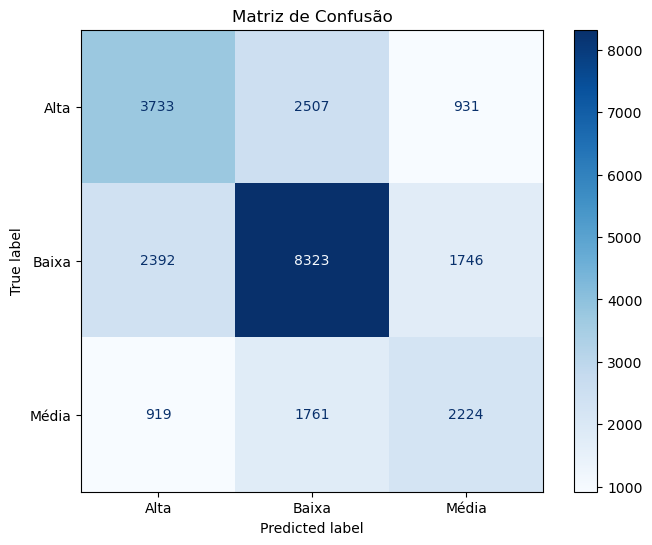

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, previsoes, ax=ax, cmap='Blues', values_format='d')
ax.set_title('Matriz de Confusão')
plt.show()

Feature engineering

In [8]:
principais_acoes = 150
principais_acoes = dataset_educacao_filtrado['NOME AÇÃO'].value_counts().nlargest(principais_acoes).index
dataset_educacao_filtrado['Nome_Acao_Tratado'] = dataset_educacao_filtrado['NOME AÇÃO'].where(dataset_educacao_filtrado['NOME AÇÃO'].isin(principais_acoes), 'Outros')

/tmp/ipykernel_4041/3969520334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_educacao_filtrado['Nome_Acao_Tratado'] = dataset_educacao_filtrado['NOME AÇÃO'].where(dataset_educacao_filtrado['NOME AÇÃO'].isin(principais_acoes), 'Outros')


In [27]:
features_novas = [
    'NOME ÓRGÃO SUBORDINADO',
    'Nome_Acao_Tratado',
    'NOME GRUPO DE DESPESA',
    'ORÇAMENTO ATUALIZADO (R$)'
]

X_novo = dataset_educacao_filtrado[features_novas]
y = dataset_educacao_filtrado['Categoria_Execucao']

In [28]:
colunas_categoricas = X_novo.select_dtypes(include=['object']).columns
colunas_numericas = X_novo.select_dtypes(include=np.number).columns

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ])

X_transformado = preprocessor.fit_transform(X_novo)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_transformado, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

In [ ]:
modelo.fit(X_train, y_train)

In [ ]:
previsoes = modelo.predict(X_test)

In [ ]:
acuracia = accuracy_score(y_test, previsoes)
print(f"\nAcurácia do modelo: {acuracia:.2%}")


Acurácia do modelo: 58.28%


In [ ]:
print(classification_report(y_test, previsoes, target_names=['Alta', 'Baixa', 'Média']))

              precision    recall  f1-score   support

        Alta       0.53      0.52      0.53      7171
       Baixa       0.66      0.67      0.67     12461
       Média       0.45      0.45      0.45      4904

    accuracy                           0.58     24536
   macro avg       0.55      0.55      0.55     24536
weighted avg       0.58      0.58      0.58     24536



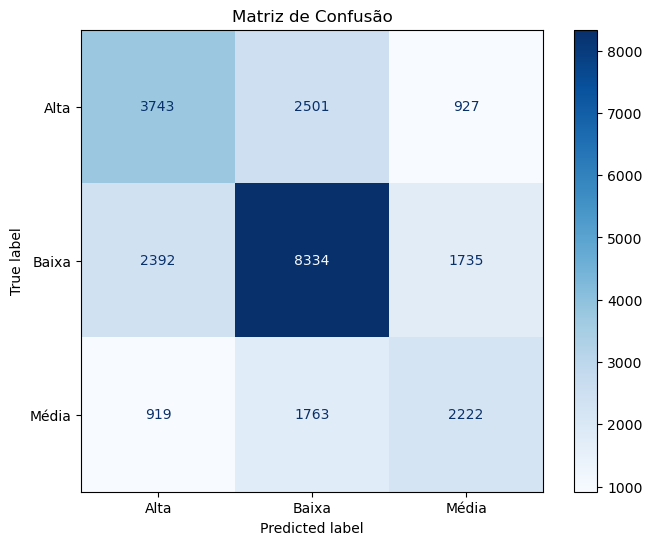

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, previsoes, ax=ax, cmap='Blues', values_format='d')
ax.set_title('Matriz de Confusão')
plt.show()

Utilizando mais features

In [8]:
principais_acoes = 150
lista_principais_acoes = dataset_educacao_filtrado['NOME AÇÃO'].value_counts().nlargest(principais_acoes).index
dataset_educacao_filtrado['Nome_Acao_Tratado'] = dataset_educacao_filtrado['NOME AÇÃO'].where(dataset_educacao_filtrado['NOME AÇÃO'].isin(lista_principais_acoes), 'Outros')

/tmp/ipykernel_4137/657760596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_educacao_filtrado['Nome_Acao_Tratado'] = dataset_educacao_filtrado['NOME AÇÃO'].where(dataset_educacao_filtrado['NOME AÇÃO'].isin(lista_principais_acoes), 'Outros')


In [9]:
orcamento_total_por_orgao = dataset_educacao_filtrado.groupby('NOME ÓRGÃO SUBORDINADO')['ORÇAMENTO ATUALIZADO (R$)'].transform('sum')
dataset_educacao_filtrado['Proporcao_Orgao'] = dataset_educacao_filtrado['ORÇAMENTO ATUALIZADO (R$)'] / orcamento_total_por_orgao

/tmp/ipykernel_4137/3472188052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_educacao_filtrado['Proporcao_Orgao'] = dataset_educacao_filtrado['ORÇAMENTO ATUALIZADO (R$)'] / orcamento_total_por_orgao


In [10]:
features_finais = [
    'NOME ÓRGÃO SUBORDINADO',
    'Nome_Acao_Tratado',
    'NOME GRUPO DE DESPESA',
    'ORÇAMENTO ATUALIZADO (R$)',
    'NOME CATEGORIA ECONÔMICA',
    'NOME PROGRAMA ORÇAMENTÁRIO',
    'NOME SUBFUNÇÃO',
    'Proporcao_Orgao'
]

X_final = dataset_educacao_filtrado[features_finais]
y = dataset_educacao_filtrado['Categoria_Execucao']

In [11]:
colunas_categoricas = X_final.select_dtypes(include=['object']).columns
colunas_numericas = X_final.select_dtypes(include=np.number).columns

In [12]:
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', colunas_numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), colunas_categoricas)
])

In [13]:
X_transformado = preprocessor.fit_transform(X_final)
X_train, X_test, y_train, y_test = train_test_split(X_transformado, y, test_size=0.2, random_state=42, stratify=y)
modelo_final = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

In [ ]:
modelo_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [ ]:
previsoes_finais = modelo_final.predict(X_test)

In [ ]:
acuracia = accuracy_score(y_test, previsoes_finais)
print(f"\nAcurácia do modelo: {acuracia:.2%}")


Acurácia do modelo: 59.95%


In [ ]:
print(classification_report(y_test, previsoes_finais))

              precision    recall  f1-score   support

        Alta       0.55      0.54      0.55      7171
       Baixa       0.67      0.70      0.68     12461
       Média       0.48      0.44      0.46      4904

    accuracy                           0.60     24536
   macro avg       0.57      0.56      0.56     24536
weighted avg       0.60      0.60      0.60     24536



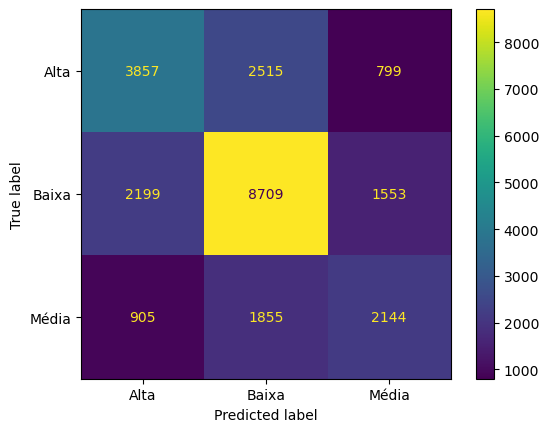

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, previsoes_finais, cmap='viridis')

Otimização de hiperparâmetros

In [14]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [15]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [18]:
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=7,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [19]:
rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  56.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time= 1.0min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time= 1.0min
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; t

Exception ignored in: <function ResourceTracker.__del__ at 0x77c710177920>
Traceback (most recent call last):
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x78aa90b83920>
Traceback (most recent call last):
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _sto

[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=12.5min
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=13.1min
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=11.8min


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=7, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [20]:
melhor_modelo = rand_search.best_estimator_

In [21]:
print("\nMelhores parâmetros encontrados:")
print(rand_search.best_params_)


Melhores parâmetros encontrados:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': True}


In [22]:
previsoes_otimizadas = melhor_modelo.predict(X_test)

In [23]:
acuracia_otimizada = accuracy_score(y_test, previsoes_otimizadas)
print(f"\nAcurácia do modelo otimizado: {acuracia_otimizada:.2%}")


Acurácia do modelo otimizado: 61.06%


In [24]:
print(classification_report(y_test, previsoes_otimizadas))

              precision    recall  f1-score   support

        Alta       0.55      0.63      0.59      7171
       Baixa       0.73      0.61      0.66     12461
       Média       0.49      0.57      0.53      4904

    accuracy                           0.61     24536
   macro avg       0.59      0.61      0.59     24536
weighted avg       0.63      0.61      0.61     24536



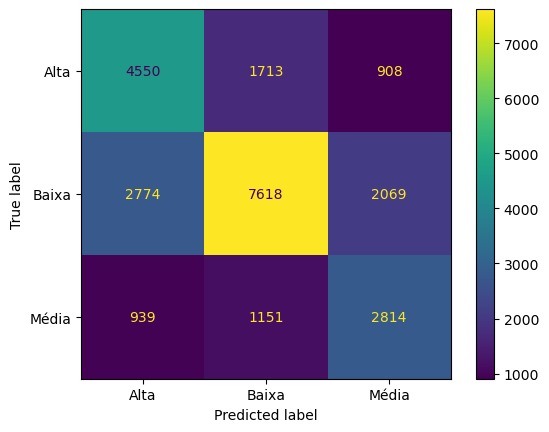

Exception ignored in: <function ResourceTracker.__del__ at 0x74559077b920>
Traceback (most recent call last):
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7dd7d3783920>
Traceback (most recent call last):
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/davi/miniconda3/envs/ciencia-dados/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _sto

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, previsoes_otimizadas, cmap='viridis')
plt.show()